In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

In [0]:
from fastai.vision import *

In [0]:
from fastai.metrics import error_rate

In [0]:
bs=64 

In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [0]:
#URLs.PETS
path = untar_data(URLs.PETS); path #its downloading and exracting my data.

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls() #tells me whats in it

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
#ima create path objects for each of the things in it.
path_anno = path/'annotations' 
path_img = path/'images'
#i can do this easily thanks to fastai :)


so whats in my data? Lemme see it. 

How are my data directories structured? 

What are my images like? 

how are my labels present? 


In [0]:
#path_anno.ls()
print (path_img.ls()[2:6]) #i see my data images are in folders. and labels of the images are as filenames themselves.
#usually CV data are distributed like this :).
fnames = get_image_files(path_img)#extract my filenames
#for i in fnames[4:8]:
print ( fnames[3:7] ) 

#CAN I PRINT THESE ON DIFFERENT LINES?

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_147.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_91.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_105.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_34.jpg')]
[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_91.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_105.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_34.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_186.jpg')]


extract labels from it. 

In [0]:
np.random.seed(2) #Question : why did i not need to import numpy here?
pat = r'/([^/]+)_\d+.jpg$'   #my regular expression pattern. 

In [0]:
#creating a databunch
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

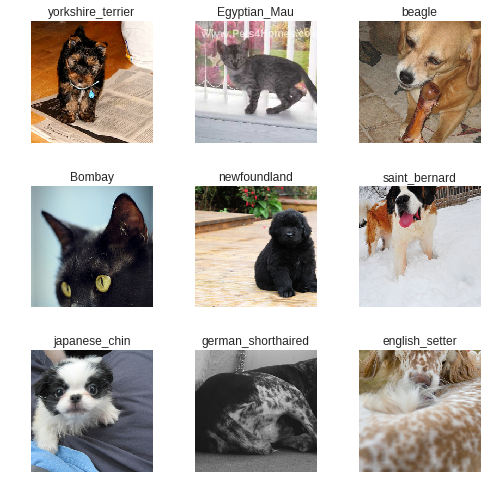

In [0]:
data.show_batch( rows=3, figsize=(7,7) ) 

After running it tens of times,  I see that the images are pretty cool. 

They are animals in each of them. [no text and wierd stuff] . 

They aren't rotated nor do they have balck borders. 

Pretty good I think. 


In [0]:
#total classes of images in the data. 
print(data.classes)
print (len(data.classes) )
print (data.c)  #what is data.c?

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
37
37


In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [0]:
learn.model 
#we here have created a CNN resnet Model.

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.380570,0.337608,0.097429
2,0.563424,0.265332,0.090663
3,0.345764,0.227901,0.073748
4,0.258867,0.210324,0.068336


In [0]:
learn.save('stage-1')  #save my weights as stage-1. 

Question: What is fit One Cycle? 

# Let's check out the Results 

how are my results? 

what did my model confuse the most? 



In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

In [0]:
len(data.valid_ds)== len(losses) ==len(idxs)

True

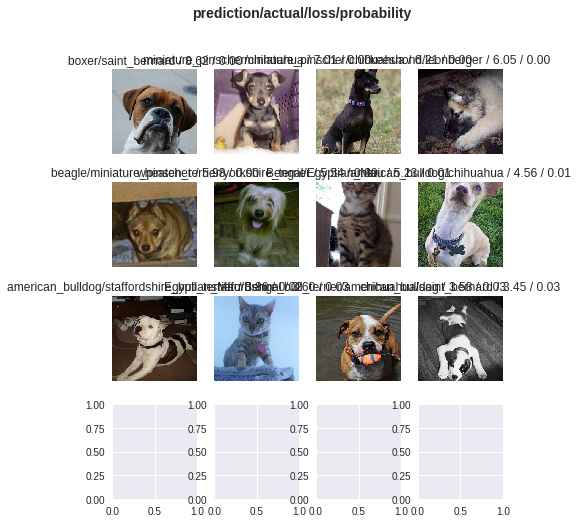

In [0]:
interp.plot_top_losses(12, figsize=(7,8))

In [0]:
doc(interp.plot_top_losses)

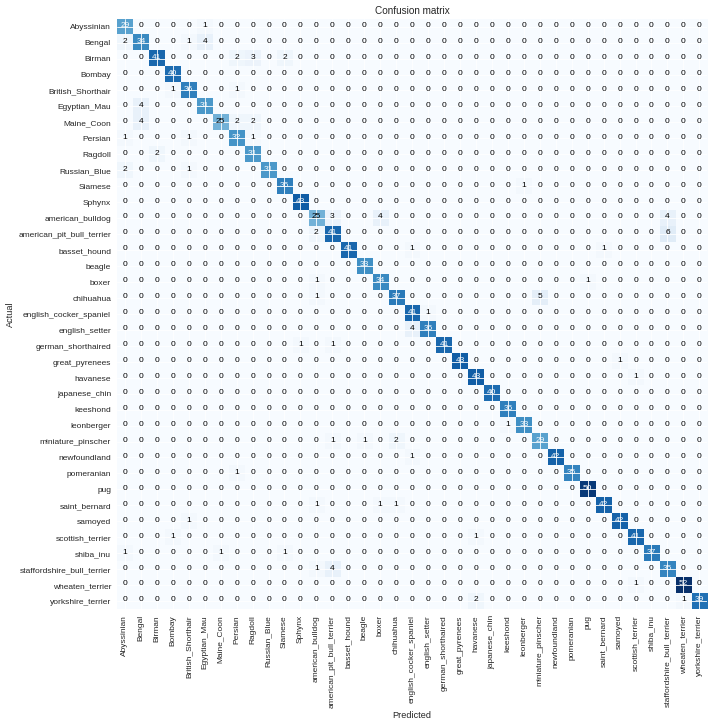

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

this is kinda skewed as the things that it is confusing are those breeds that are easily confused by humans. 

like 'american_pit_bull_terrier' and 'staffordshire_bull_terrier'



Let's see what pairs that are confused with the most :) 


In [0]:
interp.most_confused(min_val = 3)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('chihuahua', 'miniature_pinscher', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Maine_Coon', 'Bengal', 4),
 ('american_bulldog', 'boxer', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('english_setter', 'english_cocker_spaniel', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4)]

# unfreezing, fine tuning, and  learning rates

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.575410,0.325396,0.100812


In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category Bengal, Category Maine_Coon, Category newfoundland, Category pug, Category Persian]...
Path: /root/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 333, 500), Image (3, 314, 500), Image (3, 334, 500), Image (3, 448, 500), Image (3, 500, 375)]...
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category american_pit_bull_terrier, Category staffordshire_bull_terrier, Category Bengal, Category english_setter, Category havanese]...
Path: /root/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 375, 500), Image (3, 364, 500), Image (3, 433, 500), Image (3, 333, 500), Image (3, 500, 375)]...
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


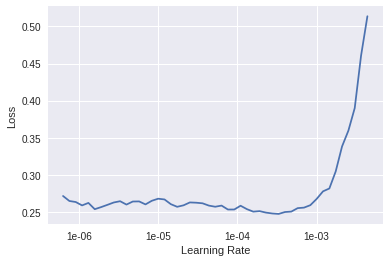

In [0]:
learn.recorder.plot()